# Library Imports

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as immg
import cv2
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


## Importing Images to Work With

In [2]:
kaggleStyle = cv2.imread("/content/drive/MyDrive/ENEE 439D Final Project/PCB_DATASET/PCB_USED/01.JPG")
defect = cv2.imread("/content/drive/MyDrive/ENEE 439D Final Project/PCB_DATASET/aerospace_corp_defects/MAXQ7667EVKIT-1#-ND/1/rear.png")
kaggleStyle = cv2.cvtColor(kaggleStyle,cv2.COLOR_BGR2GRAY)
defect = cv2.cvtColor(defect,cv2.COLOR_BGR2GRAY)

In [ ]:
cv2_imshow(kaggleStyle)

Output hidden; open in https://colab.research.google.com to view.

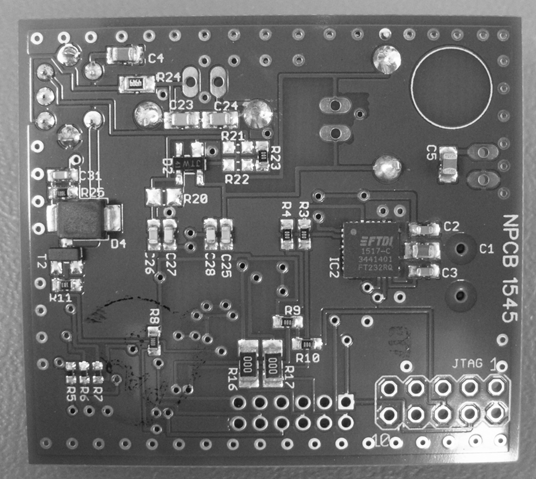

In [3]:
cv2_imshow(defect)

# Kaggle Dataset Transfer

## Initial Setup

In [ ]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [ ]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [ ]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [ ]:
style_path = tf.keras.utils.get_file(fname="/content/drive/MyDrive/ENEE 439D Final Project/PCB_DATASET/PCB_USED/01.JPG",origin="/content/drive/MyDrive/ENEE 439D Final Project/PCB_DATASET/PCB_USED/01.JPG")
#style_path = tf.keras.utils.get_file(fname = "/content/drive/MyDrive/ENEE 439D Final Project/PCB_DATASET/aerospace_corp_defects/MAXQ7667EVKIT-1#-ND/template_back.png", origin = "/content/drive/MyDrive/ENEE 439D Final Project/PCB_DATASET/aerospace_corp_defects/MAXQ7667EVKIT-1#-ND/template_back.png")
content_path = tf.keras.utils.get_file(fname="/content/drive/MyDrive/ENEE 439D Final Project/PCB_DATASET/aerospace_corp_defects/MAXQ7667EVKIT-1#-ND/1/rear.png", origin="/content/drive/MyDrive/ENEE 439D Final Project/PCB_DATASET/aerospace_corp_defects/MAXQ7667EVKIT-1#-ND/1/rear.png")

In [ ]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [ ]:
content_image = load_img(content_path)
style_image = load_img(style_path)

In [ ]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

In [ ]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
defect1_style = tensor_to_image(stylized_image)

## Defect 2

In [ ]:
defect2 = tf.keras.utils.get_file(fname = "/content/drive/MyDrive/ENEE 439D Final Project/PCB_DATASET/aerospace_corp_defects/MAXQ7667EVKIT-1#-ND/2/rear.png",
                                  origin = "/content/drive/MyDrive/ENEE 439D Final Project/PCB_DATASET/aerospace_corp_defects/MAXQ7667EVKIT-1#-ND/2/rear.png")
content_image2 = load_img(defect2)
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image2 = hub_model(tf.constant(content_image2), tf.constant(style_image))[0]
defect2_style = tensor_to_image(stylized_image2)

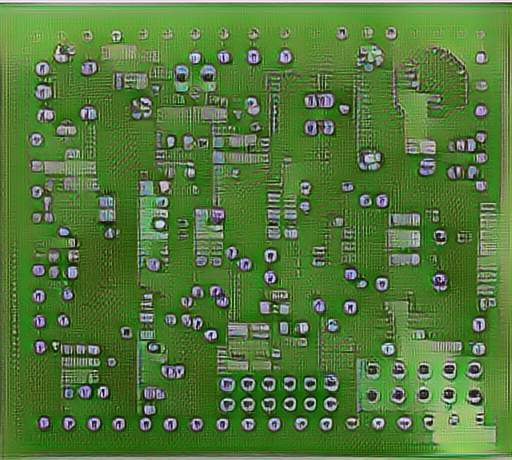

In [ ]:
cv2_imshow(defect1_style)

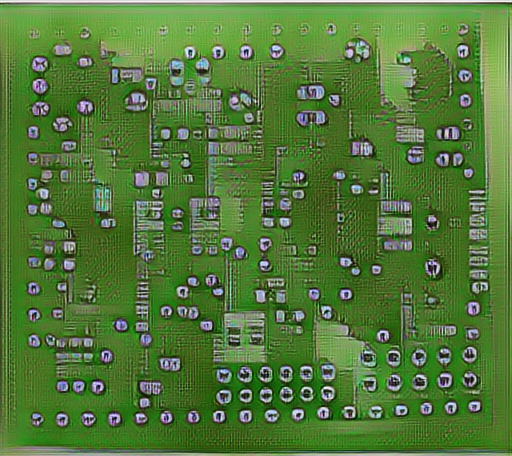

In [ ]:
cv2_imshow(defect2_style)

## SIFT

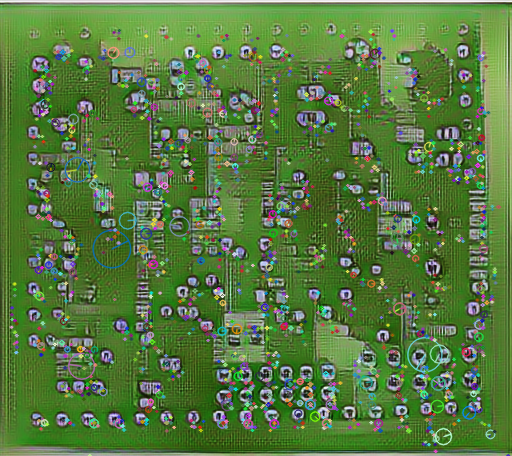

In [ ]:
defect1_style = np.asarray(defect1_style)
defect2_style = np.asarray(defect2_style)
sift = cv2.SIFT_create()
kp = sift.detect(defect1_style, None)
cv2_imshow(cv2.drawKeypoints(defect2_style,kp,defect1_style,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))